In [1]:
import pandas as pb

In [2]:
import numpy as np

In [3]:
import re

In [4]:
resp= pb.read_csv('responses.csv')

In [5]:
resp.head()

,Timestamp,Name,Year of Study,Course,Branch,How many people do you usually dine with?,"Which meal do you most frequently purchase from food outlets, either on or off-campus?",What time do you usually eat the selected meal?,How hungry are you before deciding where to eat?,Do you usually prefer to have drinks with your meal?,What is your average budget per person for a meal (enter numerical value only)?,How far are you willing to travel for food? (in minutes walking/biking/driving) (enter numerical value only),What type of food do you usually prefer while eating out?,Where do you usually go to eat based on your selections above? (on campus),off campus,How often do you visit these places in a week?,What factors influence your choice the most? (Select up to 3),Do you have any dietary restrictions or preferences?
0,4/4/2025 19:18:29,Muskan,1,MTech,Computer Science,2-3 people,Evening Refreshments,17,Somewhat hungry,No,80,5,Veg,Nescafe,bowzi,Rarely (1-2 times),Food Quality,No
1,4/4/2025 22:38:53,Rahul Sharma,4,BTech,MCE,More than 6,Dinner,22,Very hungry,Yes,200,10,Non Veg,Canteen,crazy crisp,Rarely (1-2 times),"Price, Distance, Food Quality, Speed of Service",Lactose intolerance
2,4/4/2025 22:46:26,Ayush,3,BTech,Software Engineering,2-3 people,Dinner,22,Somewhat hungry,No,140,7,Doesn't affect my choice of outlet,Hims,Zomato/Mehfil,Often (5+ times),"Food Quality, Variety",No
3,4/4/2025 22:52:55,Tanvi Rai,1,MSC,Management,Alone,Evening Refreshments,16,Very hungry,Yes,200,10,Veg,Raydee,bowzi,Sometimes (3-4 times),Price,Vegetarian food
4,4/4/2025 22:59:07,Komal,3,BTech,Software engineering,2-3 people,Dinner,20,Somewhat hungry,No,100,0,Non Veg,Raj soin,dtu cafe,Sometimes (3-4 times),"Price, Food Quality, Friend's Preference",Nope


In [6]:
resp.shape

(197, 18)

In [7]:
resp.drop('Timestamp',axis=1,inplace=True)

In [8]:
# resp.drop('id',axis=1,inplace=True)

In [9]:
# resp.insert(0, 'id', range(len(resp)))
resp.insert(0, 'id', [f'ID{str(i).zfill(3)}' for i in range(1, len(resp) + 1)])


In [10]:
resp.rename(columns={'  Do you have any dietary restrictions or preferences?  ': 'dietary_restriction'}, inplace=True)
resp.rename(columns={'  What factors influence your choice the most? (Select up to 3)  ': 'factors'}, inplace=True)
resp.rename(columns={'What type of food do you usually prefer while eating out? ': 'preferred_food_type'}, inplace=True)
resp.rename(columns={'  What is your average budget per person for a meal (enter numerical value only)?': 'budget'}, inplace=True)
resp.rename(columns={'  Do you usually prefer to have drinks with your meal?  ': 'prefer_drinks'}, inplace=True)
resp.rename(columns={'  How hungry are you before deciding where to eat?  ': 'hunger_level'}, inplace=True)
resp.rename(columns={'  Where do you usually go to eat based on your selections above? (on campus)': 'places'}, inplace=True)
resp.rename(columns={'Which meal do you most frequently purchase from food outlets, either on or off-campus? ': 'frequent_meal_type'}, inplace=True)
resp.rename(columns={'  How far are you willing to travel for food? (in minutes walking/biking/driving) (enter numerical value only)': 'distance'}, inplace=True)

In [11]:
resp.drop(['Name ','Year of Study','Course ','Branch ','  How often do you visit these places in a week?  ','off campus ','What time do you usually eat the selected meal?','  How many people do you usually dine with?  '],axis=1,inplace=True)



In [12]:
resp['places'] = resp['places'].replace('i dont eat on campus', 'canteen')

In [13]:
resp['places'] = resp['places'].replace('Canteen', 'canteen')

In [14]:
resp['places'] = resp['places'].replace('Bistro 57', 'Bistro57')
resp['places'] = resp['places'].replace('Bistro', 'Bistro57')
resp['places'] = resp['places'].replace('bistro', 'Bistro57')
resp['places'] = resp['places'].replace( 'udipi', 'udupi')
resp['places'] = resp['places'].replace( 'DelTech cafe', 'deltech')
resp['places'] = resp['places'].replace( 'Any Mess', 'Mess')
resp['places'] = resp['places'].replace( 'Raj soin', 'Raj_Soin')
resp['places'] = resp['places'].replace( 'Rajsoin, Deltech', 'Raj_Soin')
resp['places'] = resp['places'].replace( 'Nescafe ', 'Nescafe')
resp['places'] = resp['places'].replace( 'Deltech', 'deltech')
resp['places'] = resp['places'].replace( 'Deltech cafe, bistro', 'bistro')
resp['places'] = resp['places'].replace( 'DelTech', 'deltech')
resp['places'] = resp['places'].replace('Udupi Cafe', 'udupi')
resp['places'] = resp['places'].replace('canteen', 'Raj_Soin')
resp['places'] = resp['places'].replace('Bistro57', 'Raj_Soin')
resp['places'] = resp['places'].replace('Dominos', 'Raj_Soin')
resp['places'] = resp['places'].replace('Dominos', 'Raj_Soin')

In [15]:
resp['places'] = resp['places'].replace('Udupi (Raj Soin)', 'udupi')
resp['places'] = resp['places'].replace('At Raj Soin', 'Raj_Soin')
resp['places'] = resp['places'].replace('Udupi', 'udupi')

In [16]:
resp['places'].unique()

array(['Nescafe', 'Raj_Soin', 'Hims', 'Raydee', 'Mess', 'Dosa Plaza',
       'udupi', 'deltech', 'bistro', 'Dazzledine'], dtype=object)

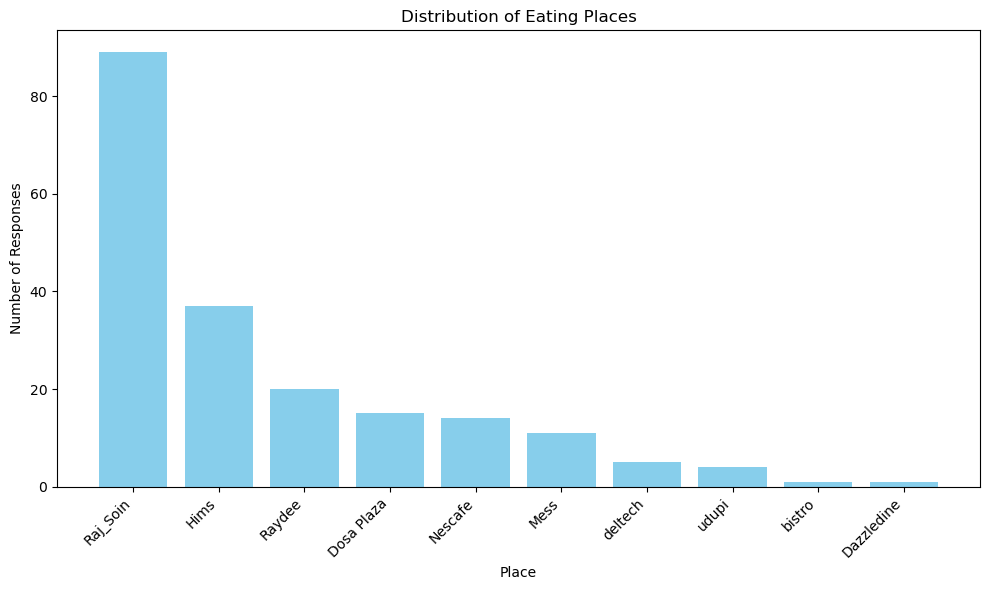

In [17]:
import matplotlib.pyplot as plt

place_counts = resp['places'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(place_counts.index, place_counts.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Eating Places')
plt.xlabel('Place')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

In [18]:
place_counts = resp['places'].value_counts()
print(place_counts)

places
Raj_Soin      89
Hims          37
Raydee        20
Dosa Plaza    15
Nescafe       14
Mess          11
deltech        5
udupi          4
bistro         1
Dazzledine     1
Name: count, dtype: int64


In [19]:
resp.head()


,id,frequent_meal_type,hunger_level,prefer_drinks,budget,distance,preferred_food_type,places,factors,dietary_restriction
0,ID001,Evening Refreshments,Somewhat hungry,No,80,5,Veg,Nescafe,Food Quality,No
1,ID002,Dinner,Very hungry,Yes,200,10,Non Veg,Raj_Soin,"Price, Distance, Food Quality, Speed of Service",Lactose intolerance
2,ID003,Dinner,Somewhat hungry,No,140,7,Doesn't affect my choice of outlet,Hims,"Food Quality, Variety",No
3,ID004,Evening Refreshments,Very hungry,Yes,200,10,Veg,Raydee,Price,Vegetarian food
4,ID005,Dinner,Somewhat hungry,No,100,0,Non Veg,Raj_Soin,"Price, Food Quality, Friend's Preference",Nope


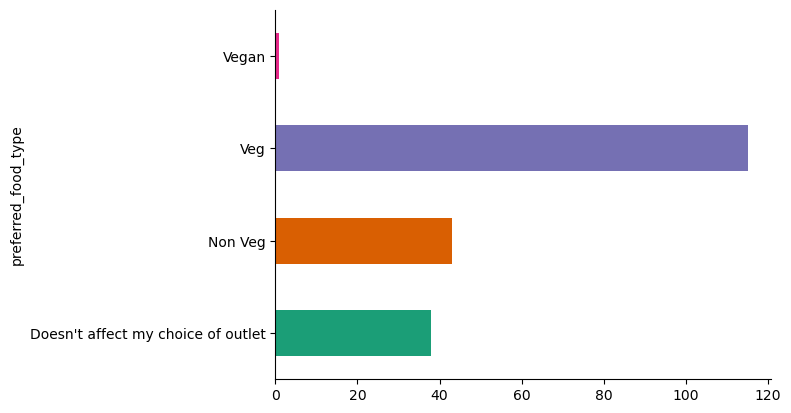

In [20]:
# @title preferred_food_type

from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('preferred_food_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
resp['preferred_food_type'] = resp['preferred_food_type'].replace('Vegan', 'Veg')

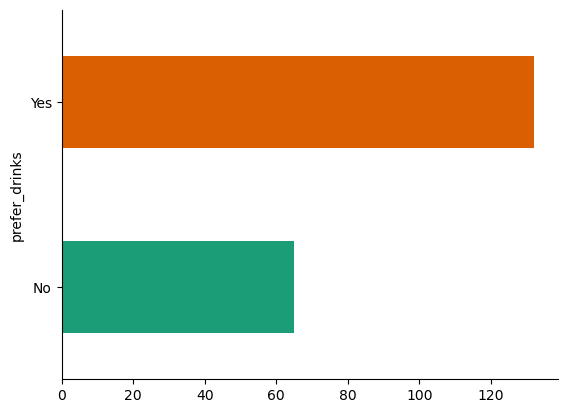

In [22]:
# @title prefer_drinks

from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('prefer_drinks').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

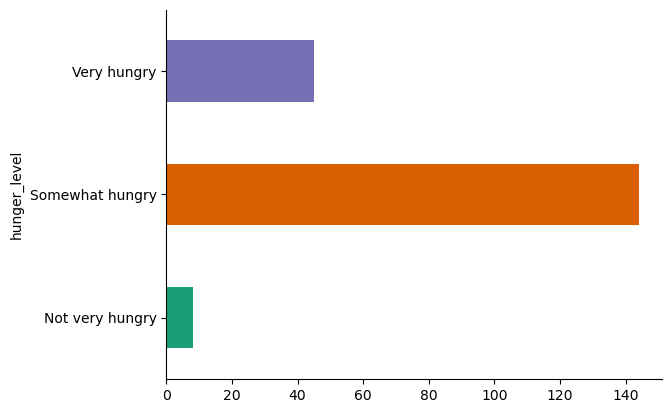

In [23]:
# @title hunger_level

from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('hunger_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
resp['hunger_level'] = resp['hunger_level'].replace('Not very hungry', 'Somewhat hungry')

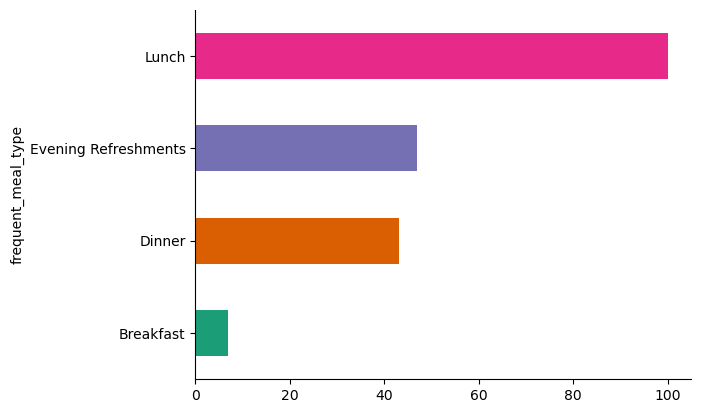

In [25]:
# @title frequent_meal_type

from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('frequent_meal_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

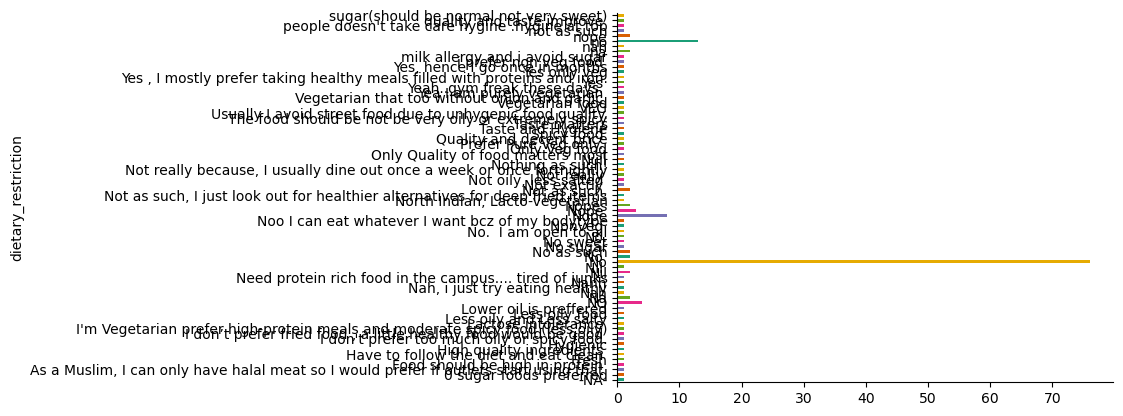

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('dietary_restriction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

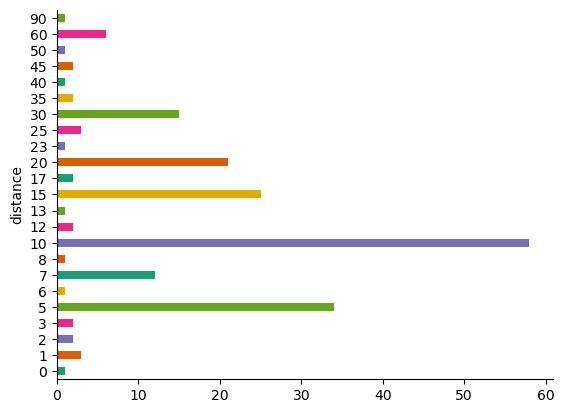

In [27]:
#distance
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('distance').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
bins = [0, 50, 100, 150, 200, 500, 1000, float('inf')]
labels = ['<50', '50-100', '100-150', '150-200', '200-500', '500-1000', '1000+']


resp['budget_range'] = pb.cut(resp['budget'], bins=bins, labels=labels, include_lowest=True)

In [29]:
resp.drop('budget',axis=True,inplace=True)

C:\Users\Deepak Singh\AppData\Local\Temp\ipykernel_16936\237491171.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resp.groupby('budget_range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))


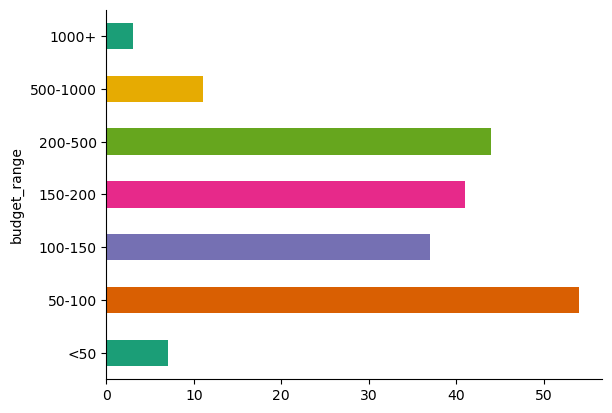

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('budget_range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
# resp.to_csv('food_recommendation_data.csv', index=False)
resp.drop('dietary_restriction',axis=1,inplace=True)

In [32]:
(resp.columns.tolist())

['id',
 'frequent_meal_type',
 'hunger_level',
 'prefer_drinks',
 'distance',
 'preferred_food_type',
 'places',
 'factors',
 'budget_range']

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
resp['hunger_level_'] = le.fit_transform(resp['hunger_level'])

In [34]:
le = LabelEncoder()
resp['frequent_meal_type_'] = le.fit_transform(resp['frequent_meal_type'])

In [35]:
le = LabelEncoder()
resp['places_'] = le.fit_transform(resp['places'])



In [36]:
le = LabelEncoder()
resp['prefer_drinks_'] = le.fit_transform(resp['prefer_drinks'])

In [37]:
le = LabelEncoder()
resp['prefer_food_type_'] = le.fit_transform(resp['preferred_food_type'])

In [38]:
resp.drop('prefer_drinks',axis=1,inplace=True)

In [39]:
resp.drop('preferred_food_type',axis=1,inplace=True)

In [40]:
#check the mapping
for idx, label in enumerate(le.classes_):
    print(f"{idx}: {label}")

0: Doesn't affect my choice of outlet
1: Non Veg
2: Veg


In [41]:
resp.drop('hunger_level',axis=1,inplace=True)


In [42]:
resp.drop('frequent_meal_type',axis=1,inplace=True)
resp.drop('places',axis=1,inplace=True)
resp.drop('factors',axis=1,inplace=True)
resp.drop('distance',axis=1,inplace=True)

In [43]:
resp

,id,budget_range,hunger_level_,frequent_meal_type_,places_,prefer_drinks_,prefer_food_type_
0,ID001,50-100,0,2,4,0,2
1,ID002,150-200,1,1,5,1,1
2,ID003,100-150,0,1,2,0,0
3,ID004,150-200,1,2,6,1,2
4,ID005,50-100,0,1,5,0,1
...,...,...,...,...,...,...,...
192,ID193,50-100,0,3,5,1,0
193,ID194,50-100,0,3,9,1,2
194,ID195,500-1000,0,1,4,1,0
195,ID196,50-100,1,2,6,0,2


# Logistic Regression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = resp[['hunger_level_', 'frequent_meal_type_', 'budget_range', 'prefer_drinks_', 'prefer_food_type_']]
y = resp['places_']

# One-hot encode budget range if needed
X = pb.get_dummies(X, columns=['budget_range'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.45      0.89      0.60        19
           6       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1

    accuracy                           0.42        40
   macro avg       0.06      0.13      0.09        40
weighted avg       0.21      0.42      0.28        40



C:\Users\Deepak Singh\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Deepak Singh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Deepak Singh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

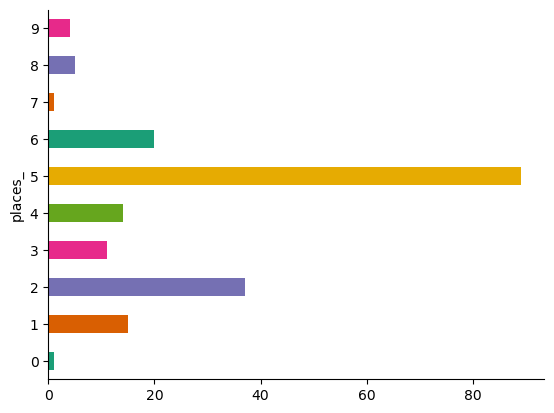

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
resp.groupby('places_').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
resp['places_'] = resp['places_'].replace(0, 1)

# Random Forest

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Check the number of available samples
n_samples = X_train.shape[0]

# Set neighbors <= n_samples
n_neighbors = min(5, n_samples)  # or any value <= n_samples

model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [48]:

if len(X_train) >= 2:
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
else:
    print("Not enough samples to run KNN with n_neighbors=2")


In [49]:
print(f"Samples available: {len(X_train)}")


Samples available: 157


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Make sure 'budget_range' exists
assert 'budget_range' in resp.columns

# Step 2: Clean target labels


# Step 3: Feature and label selection
X = resp[['hunger_level_', 'frequent_meal_type_', 'budget_range', 'prefer_drinks_', 'prefer_food_type_']]
y = resp['places_']
print(y.value_counts())

places_
5    89
2    37
6    20
1    16
4    14
3    11
8     5
9     4
7     1
Name: count, dtype: int64


In [51]:
# Step 4: Filter out rare classes
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index
mask = y.isin(valid_classes)
X = X[mask]
y = y[mask]


# Step 5: Define categorical and numeric columns
categorical_cols = ['budget_range']
numeric_cols = ['hunger_level_', 'frequent_meal_type_', 'prefer_drinks_', 'prefer_food_type_']

# Step 6: One-hot encode categorical features
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric features as-is
)

X_encoded = encoder.fit_transform(X)

# Step 7: Apply SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

# Step 8: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Step 9: Train Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Step 10: Evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78        18
           2       0.67      0.71      0.69        17
           3       1.00      0.94      0.97        18
           4       1.00      0.89      0.94        18
           5       0.62      0.44      0.52        18
           6       0.93      0.78      0.85        18
           8       0.86      1.00      0.92        18
           9       0.72      1.00      0.84        18

    accuracy                           0.82       143
   macro avg       0.82      0.82      0.81       143
weighted avg       0.82      0.82      0.81       143



In [52]:
import sklearn
print(sklearn.__version__)


1.6.1


In [53]:
import cloudpickle

with open("encoder_oncampus.pkl", "wb") as f:
    cloudpickle.dump(encoder, f)
    

In [54]:
with open("model_oncampus.pkl", "wb") as f:
    cloudpickle.dump(rf, f)
